In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

# Create Dataset

In [3]:
n_pts = 500
# noise - a parameter that determines how much the circles are spread out, factor - a parameter that specifies relatively size of smaller region
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [4]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

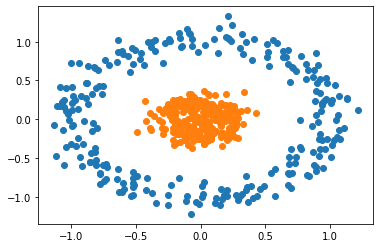

In [5]:
scatter_plot()

# Deep Neural Network Model

In [6]:
class Model(nn.Module):
    # H1 - hidden layer
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        # here we use sigmoid function to change our output to probability
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# Model Training

In [8]:
# Cross Entropy
criterion = nn.BCELoss()
# Adam Optimisiation
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [9]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
#     print("Epoch: ", i, "Loss: ", loss)
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0.5, 0, 'Epoch')

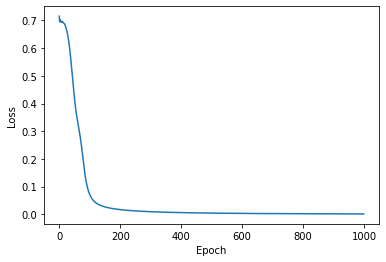

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Model Testing

In [23]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
    xx, yy = np.meshgrid(x_span, y_span)
    # ravel - change 2-dimentional structure to 1-dimentional structure
    # c_ - columnize
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    

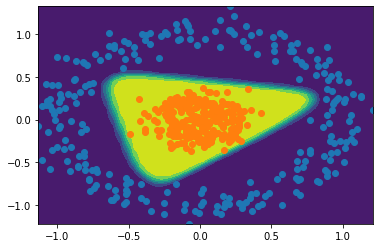

In [25]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction:  1


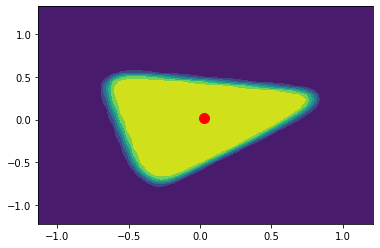

In [27]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction: ", prediction)
plot_decision_boundary(X, y)